In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/coffee_dataset.csv


In [32]:
# our complete dataset
coffee_full = pd.read_csv('/kaggle/input/coffee_dataset.csv')
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [33]:
np.random.seed(42)

#this is the only data you might actually get in the real world.
#lets build confidence interval based on the sample dataset 
coffee_sample = coffee_full.sample(200)
coffee_sample.head()
print(coffee_sample.shape)
display(coffee_sample.head())

(200, 4)


,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


1. What is the proportion of coffee drinkers in the sample? 
2. What is the proportion of individuals that don't drink coffee?

In [34]:
#drink coffee
coffee_sample['drinks_coffee'].mean()

0.595

In [35]:
#dont drink coffee
1 - coffee_sample['drinks_coffee'].mean()

0.405

In [36]:
#average height of that individual who drink coffee 
filter_True = coffee_sample['drinks_coffee'] == True
sample_tmp = coffee_sample[filter_True]
avg_height = sample_tmp['height'].mean()
print(avg_height)

68.11962990858618


Now simulate your bootstrap sample 10,000 times and take the mean height of the** non-coffee** drinkers in each sample. Plot the distribution, and pull the values necessary for a 95% confidence interval. What do you notice about the sampling distribution of the mean in this example? 


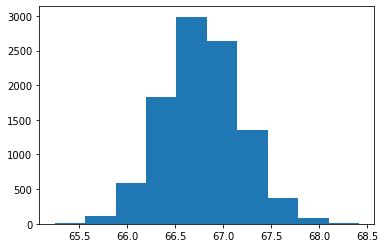

In [37]:
boots_mean = []
for i in range(10000):
    boots_sample = coffee_sample.sample(200, replace=True)
    sample_mean = boots_sample[boots_sample['drinks_coffee'] == False]['height'].mean()
    boots_mean.append(sample_mean)
    
#plot sample means 
plt.hist(boots_mean)
plt.show()

In [40]:
#since we dont have the population data we have to cut 2.5% from botton and top 

np.percentile(boots_mean, 2.5), np.percentile(boots_mean, 97.5)

(65.9929132815752, 67.58402738281573)

### You can interpret your confidence interval as We are 95% confident, that the mean height of all non-coffee-drinker is between 65.99 to 67.59. 

In [41]:
#lets caclulate the non-coffee-drinker height from our actual data 
coffee_full[coffee_full['drinks_coffee']==False]['height'].mean()

66.44340776214705